In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image
from sklearn.preprocessing import LabelBinarizer
#https://www.youtube.com/watch?v=xcBvcOXLu9A

In [ ]:
!wget https://bashupload.com/OeVER/158Gg.zip
!unzip *zip

--2020-07-20 01:58:59--  https://bashupload.com/OeVER/158Gg.zip
Resolving bashupload.com (bashupload.com)... 116.203.186.178
Connecting to bashupload.com (bashupload.com)|116.203.186.178|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 65633206 (63M) [application/zip]
Saving to: ‘158Gg.zip’

158Gg.zip           100%[===================>]  62.59M  9.82MB/s    in 8.0s    

2020-07-20 01:59:08 (7.81 MB/s) - ‘158Gg.zip’ saved [65633206/65633206]

Archive:  158Gg.zip
caution: filename not matched:  o5H75.zip


In [ ]:
train = pd.read_csv('sign_mnist_train.csv')
test = pd.read_csv('sign_mnist_test.csv')

In [ ]:
!unzip *.zip

Archive:  158Gg.zip
  inflating: amer_sign2.png          
  inflating: amer_sign3.png          
  inflating: american_sign_language.PNG  
  inflating: sign_mnist_test.csv     
  inflating: sign_mnist_test/sign_mnist_test.csv  
  inflating: sign_mnist_train.csv    
  inflating: sign_mnist_train/sign_mnist_train.csv  


In [ ]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,156,158,160,163,165,159,166,168,170,170,171,171,171,172,171,171,170,170,169,111,121,129,135,141,144,148,151,154,157,160,...,205,206,206,207,207,206,206,204,205,204,203,202,142,151,160,172,196,188,188,190,135,96,86,77,77,79,176,205,207,207,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,157,158,156,154,154,153,152,151,149,149,148,147,146,144,142,143,138,92,108,158,159,159,159,160,160,160,160,160,160,160,...,100,78,120,157,168,107,99,121,133,97,95,120,135,116,95,79,69,86,139,173,200,185,175,198,124,118,94,140,133,84,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,186,185,185,185,184,184,184,181,181,179,179,179,178,178,109,52,66,77,83,188,189,189,188,188,189,188,188,188,188,187,...,203,204,203,201,200,200,199,198,196,195,194,193,198,166,132,114,89,74,79,77,74,78,132,188,210,209,206,205,204,203,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,211,209,207,208,207,206,203,202,201,200,198,197,195,192,197,171,51,52,54,212,213,215,215,212,212,213,212,212,211,211,...,247,242,233,231,230,229,227,225,223,221,220,216,58,51,49,50,57,60,17,15,18,17,19,1,159,255,237,239,237,236,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,186,188,189,189,190,191,189,190,190,187,190,192,193,191,191,192,192,194,194,166,169,172,174,177,180,182,185,186,187,190,...,90,77,88,117,123,127,129,134,145,152,156,179,105,106,105,104,104,104,175,199,178,152,136,130,136,150,118,92,85,76,92,105,105,108,133,163,157,163,164,179


In [ ]:
train.shape

(27455, 785)

In [ ]:
labels = train['label'].values
train.drop('label', axis=1, inplace=True)
train.shape

(27455, 784)

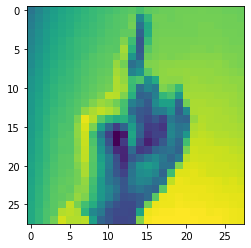

In [ ]:
lbz = LabelBinarizer()
labels = lbz.fit_transform(labels)
images = train.values
images = np.array([np.reshape(i, (28, 28)) for i in images])
images = np.array([i.flatten() for i in images])
plt.imshow(images[0].reshape(28,28))

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(images, labels, test_size=0.3, random_state=101)

In [ ]:
xtrain = xtrain / 225
xtest = xtest / 225
xtrain = xtrain.reshape(xtrain.shape[0], 28, 28, 1)
xtest = xtest.reshape(xtest.shape[0], 28, 28, 1)


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout


In [ ]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(24, activation='softmax'))


In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [ ]:
model.fit(xtrain, ytrain, validation_data=(xtest, ytest), epochs=20, batch_size=128)

Train on 19218 samples, validate on 8237 samples
Epoch 1/20
19218/19218 [==============================] - 8s 425us/step - loss: 2.5238 - accuracy: 0.2611 - val_loss: 1.4838 - val_accuracy: 0.6760
Epoch 2/20
19218/19218 [==============================] - 1s 59us/step - loss: 1.2766 - accuracy: 0.6070 - val_loss: 0.7321 - val_accuracy: 0.8336
Epoch 3/20
19218/19218 [==============================] - 1s 59us/step - loss: 0.8473 - accuracy: 0.7295 - val_loss: 0.4452 - val_accuracy: 0.9167
Epoch 4/20
19218/19218 [==============================] - 1s 60us/step - loss: 0.6218 - accuracy: 0.8029 - val_loss: 0.2866 - val_accuracy: 0.9547
Epoch 5/20
19218/19218 [==============================] - 1s 61us/step - loss: 0.4878 - accuracy: 0.8463 - val_loss: 0.1992 - val_accuracy: 0.9734
Epoch 6/20
19218/19218 [==============================] - 1s 60us/step - loss: 0.4018 - accuracy: 0.8721 - val_loss: 0.1371 - val_accuracy: 0.9856
Epoch 7/20
19218/19218 [==============================] - 1s 61us/st

In [ ]:
test_labels = test['label'].values
test.drop('label', axis=1, inplace=True)
test.shape

(7172, 784)

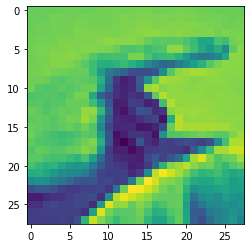

In [ ]:
test_labels = lbz.fit_transform(test_labels)
test_images = test.values
test_images = np.array([np.reshape(i, (28, 28)) for i in test_images])
test_images = np.array([i.flatten() for i in test_images])
plt.imshow(test_images[0].reshape(28,28))
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

In [ ]:
pred = model.predict(test_images)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(test_labels, pred.round())


0.7262967094255438

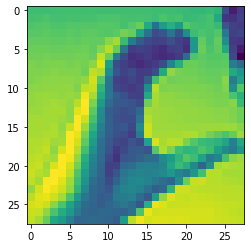

In [ ]:
plt.imshow(test_images[20].reshape(28, 28))


In [ ]:
model.predict(test_images[20].reshape(1, 28, 28, 1))

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)